<a href="https://colab.research.google.com/github/hamzautd7/CE888-Assignment-1/blob/main/DDM_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
%cd MyDrive/Fire\ vs\ No\ Fire

[Errno 2] No such file or directory: 'MyDrive/Fire vs No Fire'
/content/drive/MyDrive/Fire vs No Fire


In [ ]:
import zipfile
with zipfile.ZipFile("Training.zip","r") as zip_ref:
    zip_ref.extractall("MyDrive/Fire\ vs\ No\ Fire")

In [ ]:
from fastai.vision import *

In [ ]:
!ls

Training


In [ ]:
train_dir = 'Training' # image folder


In [ ]:
fire_imgs = [fn for fn in os.listdir(f'{train_dir}/Fire') if fn.endswith('.jpg')]
no_fire_imgs = [fn for fn in os.listdir(f'{train_dir}/No_Fire') if fn.endswith('.jpg')]

In [ ]:
# randomly select 3 of each
select_fire = np.random.choice(fire_imgs, 3, replace = False)
select_no_fire = np.random.choice(no_fire_imgs, 3, replace = False)

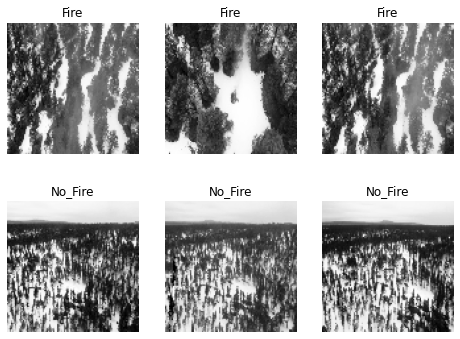

In [ ]:
# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/Fire/{fire_imgs[i]}'
        label = 'Fire'
    else:
        fp = f'{train_dir}/No_Fire/{no_fire_imgs[i-3]}'
        label = 'No_Fire'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

In [ ]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
fire_images = img2np(f'{train_dir}/Fire/', normal_imgs)
no_fire_images = img2np(f'{train_dir}/No_Fire/', pneumo_imgs)

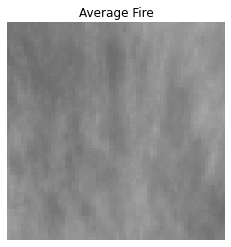

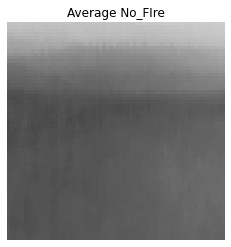

In [ ]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(fire_images, 'Fire')
pneu_mean = find_mean_img(no_fire_images, 'No_FIre')

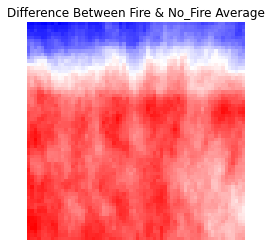

In [ ]:
contrast_mean = norm_mean - pneu_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Fire & No_Fire Average')
plt.axis('off')
plt.show()